# MGFD25 Assignment 2: 
## Predicting loan failures

This notebook will first walk you through the steps in data exploration and data cleaning using Pandas.  Then we'll try to predict which customer is going to default on their loans using a machine learning model called Decision Tree.  Before we begin, let's review the analytic process.
The cross-industry standard process for data mining, known as *CRISP-DM*, is an open standard process model that describes common approaches used by data mining experts!

Source: sap.com

The following exercise in Part 1 will focus more on the stages of *Data Exploration* and *Data Preparation*.  These two stages are critical in the building of successful machine learning models.  These two steps are also the most labour intensive and time-consuming stages.  
The dataset is sourced from kaggel.com (https://www.kaggle.com/skihikingkevin/online-p2p-lending).  It combines historical loans from both Prosper and Lending Club from 2013 to 2018.

#### Let's import the data file

In [1]:
# First we will import Panadas and other useful libraries
import os
import numpy as np
import pandas as pd

In [2]:
# Before we read the data file, let's locate the working directory
os.getcwd()

'/Users/huangweixiang/Downloads'

In [3]:
cd ~/Downloads

/Users/huangweixiang/Downloads


In [4]:
# Let's read the data file into a Pandas dataframe
df = pd.read_csv('p2p_loans.csv')

/var/folders/y9/dpfs_d2s60x39nl5c6p7wv_c0000gn/T/ipykernel_35773/2229577966.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('p2p_loans.csv')


It looks like there is a problem with column 7.  Let's keep that in mind, and we'll fix that later.  Let's first get familiar with the dataset.

## Part 1: Data exploration

Data exploration aims to understand what data exists in a dataset, its characteristics, and the relationship between elements of the data.  
Data exploration has the following stages:
1. Variable identification
2. Data structuring
3. Univariate analysis
4. Bivariate analysis
5. Missing value analysis
6. Outlier analysis

### Variable identification
When you are sourcing data, you will often find that the table names and variables names have little meaning.

Without complete metadata, it is challenging to use the data. The alternative is speaking with the owner or creator of the data, but there are obvious concerns.

The purpose of this exercise is to understand the data, their types, and their limitations.  We'll look at each variable and do a philosophical analysis about its meaning and importance for this problem.

In [5]:
# Let's take a look at the first few rows
df.tail()

loan_number  amount_borrowed  term  borrower_rate  installment grade  \
2875141      1081905          10000.0    36         0.0934   319.582092     B   
2875142      1081908          10000.0    36         0.1214   332.812163     C   
2875143      1081947           4000.0    60         0.2455   116.352367     E   
2875144      1081797          30000.0    60         0.1878   774.589469     D   
2875145      1081953           3500.0    36         0.1024   113.329941     B   

        origination_date listing_title loan_status_description data_source  
2875141       2018-06-29           NaN                 CURRENT     Prosper  
2875142       2018-06-29           NaN                 CURRENT     Prosper  
2875143       2018-06-29           NaN                 CURRENT     Prosper  
2875144       2018-06-29           NaN                 CURRENT     Prosper  
2875145       2018-06-29           NaN                 CURRENT     Prosper

In [6]:
df.shape

(2875146, 10)

In [7]:
df.columns

Index(['loan_number', 'amount_borrowed', 'term', 'borrower_rate',
       'installment', 'grade', 'origination_date', 'listing_title',
       'loan_status_description', 'data_source'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875146 entries, 0 to 2875145
Data columns (total 10 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   loan_number              int64  
 1   amount_borrowed          float64
 2   term                     int64  
 3   borrower_rate            float64
 4   installment              float64
 5   grade                    object 
 6   origination_date         object 
 7   listing_title            object 
 8   loan_status_description  object 
 9   data_source              object 
dtypes: float64(3), int64(2), object(5)
memory usage: 219.4+ MB


Luckily, the column names are very intuitive.  Otherwise, you'll need to invest time in searching for the correct data explanation. 

### Data structuring
Data does not often come formatted for modelling. We sometimes have to transform a long data table into a wide data table and vice versa. Luckily, our dataset here does not require transformation.
Example:
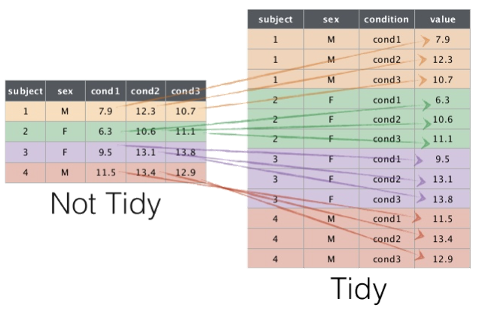

### Univariate Analysis
Univariate analysis is about understanding each variable individually. These are the statistics you are probably most familiar with: mean, mode, median, max, min, quartiles, standard deviation, and frequency. 
These can be visualized using 
* histograms
* box plots
* line charts for time series variables

We will go through a few columns and review them carefully.

In [9]:
# Let's import some python libraries that can help us analyse 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875146 entries, 0 to 2875145
Data columns (total 10 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   loan_number              int64  
 1   amount_borrowed          float64
 2   term                     int64  
 3   borrower_rate            float64
 4   installment              float64
 5   grade                    object 
 6   origination_date         object 
 7   listing_title            object 
 8   loan_status_description  object 
 9   data_source              object 
dtypes: float64(3), int64(2), object(5)
memory usage: 219.4+ MB


Loan numbers are sort of like account numbers, looking at the distriubiton won't provide much value.  Instead we want to see whether there are missing or duplicated values.

In [11]:
df['loan_number'].describe()

count    2.875146e+06
mean     5.076601e+07
std      4.813839e+07
min      5.571600e+04
25%      8.654122e+05
50%      4.516220e+07
75%      9.391978e+07
max      1.360671e+08
Name: loan_number, dtype: float64

In [12]:
# looking for missing values
df['loan_number'].isnull().sum()

0

In [13]:
# looking for duplicates
df['loan_number'].duplicated().sum()

1058

In [14]:
# create a duplicated list for further analysis
dup = df[df['loan_number'].duplicated(keep=False)]

In [15]:
dup.sort_values(by=['loan_number'])

loan_number  amount_borrowed  term  borrower_rate  installment grade  \
889167        288279          20225.0    60         0.0839   413.880000     B   
2201072       288279          25000.0    60         0.1543   600.405944     D   
197106        300390          12000.0    36         0.0649   367.740000     A   
2212428       300390          15000.0    36         0.0736   465.629411     A   
587261        302598          17600.0    60         0.0999   373.870000     B   
...              ...              ...   ...            ...          ...   ...   
187512       1081779           7050.0    36         0.0790   220.600000     A   
2875091      1081833          20000.0    36         0.2330   777.325124     E   
187409       1081833           9000.0    36         0.0662   276.340000     A   
187501       1081977          15000.0    36         0.1527   521.970000     C   
2875138      1081977          11400.0    36         0.0964   365.922141     B   

         origination_date       listing_title loan_status_description  \
889167   2016-03-01T00:00         credit_card                 CURRENT   
2201072        2015-03-17                 NaN               COMPLETED   
197106   2014-12-01T00:00  debt_consolidation               COMPLETED   
2212428        2015-03-31                 NaN               COMPLETED   
587261   2015-08-01T00:00         credit_card                 CURRENT   
...                   ...                 ...                     ...   
187512   2012-01-01T00:00  debt_consolidation               COMPLETED   
2875091        2018-06-29                 NaN                 CURRENT   
187409   2012-01-01T00:00         credit_card               COMPLETED   
187501   2012-01-01T00:00  debt_consolidation               CHARGEOFF   
2875138        2018-06-29                 NaN                 CURRENT   

          data_source  
889167   Lending Club  
2201072       Prosper  
197106   Lending Club  
2212428       Prosper  
587261   Lending Club  
...               ...  
187512   Lending Club  
2875091       Prosper  
187409   Lending Club  
187501   Lending Club  
2875138       Prosper  

[2116 rows x 10 columns]

*Is there duplicated loans?  Why is that? Should you be concerned about this and investigate further?*

Next let's look at the amount borrowed.

In [16]:
df['amount_borrowed'].describe()

count    2.875146e+06
mean     1.447258e+04
std      8.763608e+03
min      1.000000e+03
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: amount_borrowed, dtype: float64

In [17]:
# Let's import some python libraries that can help us analyse 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
sns.displot(df['amount_borrowed'])

<AxesSubplot:xlabel='amount_borrowed'>

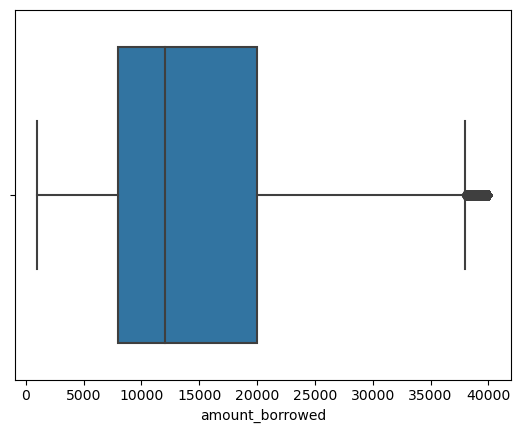

In [19]:
sns.boxplot(x=df['amount_borrowed'])

In [20]:
#skewness and kurtosis
print("Skewness: %f" % df['amount_borrowed'].skew())
print("Kurtosis: %f" % df['amount_borrowed'].kurt())

Skewness: 0.812084
Kurtosis: 0.024130


Let us examine a categlorical variable, 'listing_title'

In [21]:
df['listing_title'].describe()

count                2012068
unique                    14
top       debt_consolidation
freq                 1154304
Name: listing_title, dtype: object

[Text(0, 0, 'debt_consolidation'),
 Text(1, 0, 'home_improvement'),
 Text(2, 0, 'credit_card'),
 Text(3, 0, 'other'),
 Text(4, 0, 'major_purchase'),
 Text(5, 0, 'small_business'),
 Text(6, 0, 'house'),
 Text(7, 0, 'moving'),
 Text(8, 0, 'medical'),
 Text(9, 0, 'car'),
 Text(10, 0, 'vacation'),
 Text(11, 0, 'renewable_energy'),
 Text(12, 0, 'wedding'),
 Text(13, 0, 'educational')]

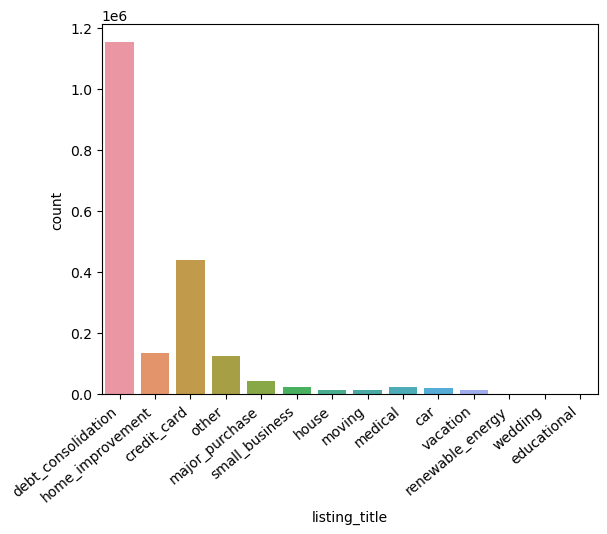

In [22]:
ax = sns.countplot(x=df['listing_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

I only went over 3 of 9 features here.  You will repeat the above steps to get familiar with the rest of the features and the target.
Here are some questions that you'll ask when you are going through each column:
* Are there missing or duplicated data?
* How is the data distributed? Are there any interesting patterns?
* Are there data outliers?
* Is the data balanced?

In the word document that you will submit, list out 10 observations that you think are interesting.  I will accept point-form.
You will then try to address these questions later in the 'Data Preparation' stage.

In [23]:
dfn = pd.read_excel('lending_clubFull_Data_Set (1).xlsx')
dfn

Unnamed: 0       id  member_id  loan_amnt        term  int_rate  \
0               0   263591     545710    20000.0   60 months     17.93   
1               1  1613916   69664096    30000.0   36 months     11.99   
2               2   818934    8965180    21500.0   36 months     11.99   
3               3  1606612   70572960    10000.0   36 months     13.67   
4               4  1639932   68589517     5000.0   36 months      8.49   
...           ...      ...        ...        ...         ...       ...   
24995       24995   901888    4974773    10500.0   36 months     10.16   
24996       24996   945413    1279809    12000.0   36 months     14.33   
24997       24997   366944   63496281    25000.0   36 months     12.69   
24998       24998  1043529   98124387    12200.0   60 months     13.49   
24999       24999  1239942  115704642     5000.0   36 months     19.03   

       installment grade sub_grade                     emp_title  ...  \
0           342.94     E        E5                     Wylie ISD  ...   
1           996.29     C        C1                      Sergeant  ...   
2           714.01     B        B3                      Designer  ...   
3           340.18     C        C3                           NaN  ...   
4           157.82     B        B1    Sr. Manufacturing Engineer  ...   
...            ...   ...       ...                           ...  ...   
24995       339.60     B        B1            Schneider Electric  ...   
24996       412.06     C        C1  Clark County School District  ...   
24997       838.63     C        C2              sales consultant  ...   
24998       280.66     C        C2                           NaN  ...   
24999       183.36     D        D3                 Web Developer  ...   

      hardship_loan_status orig_projected_additional_accrued_interest  \
0                      NaN                                        NaN   
1                      NaN                                        NaN   
2                      NaN                                        NaN   
3                      NaN                                        NaN   
4                      NaN                                        NaN   
...                    ...                                        ...   
24995                  NaN                                        NaN   
24996                  NaN                                        NaN   
24997                  NaN                                        NaN   
24998                  NaN                                        NaN   
24999                  NaN                                        NaN   

       hardship_payoff_balance_amount hardship_last_payment_amount  \
0                                 NaN                          NaN   
1                                 NaN                          NaN   
2                                 NaN                          NaN   
3                                 NaN                          NaN   
4                                 NaN                          NaN   
...                               ...                          ...   
24995                             NaN                          NaN   
24996                             NaN                          NaN   
24997                             NaN                          NaN   
24998                             NaN                          NaN   
24999                             NaN                          NaN   

      debt_settlement_flag_date settlement_status settlement_date  \
0                           NaT               NaN             NaT   
1                           NaT               NaN             NaT   
2                           NaT               NaN             NaT   
3                           NaT               NaN             NaT   
4                           NaT               NaN             NaT   
...                         ...               ...             ...   
24995                       NaT         

In [24]:
dfn.tail()

Unnamed: 0       id  member_id  loan_amnt        term  int_rate  \
24995       24995   901888    4974773    10500.0   36 months     10.16   
24996       24996   945413    1279809    12000.0   36 months     14.33   
24997       24997   366944   63496281    25000.0   36 months     12.69   
24998       24998  1043529   98124387    12200.0   60 months     13.49   
24999       24999  1239942  115704642     5000.0   36 months     19.03   

       installment grade sub_grade                     emp_title  ...  \
24995       339.60     B        B1            Schneider Electric  ...   
24996       412.06     C        C1  Clark County School District  ...   
24997       838.63     C        C2              sales consultant  ...   
24998       280.66     C        C2                           NaN  ...   
24999       183.36     D        D3                 Web Developer  ...   

      hardship_loan_status orig_projected_additional_accrued_interest  \
24995                  NaN                                        NaN   
24996                  NaN                                        NaN   
24997                  NaN                                        NaN   
24998                  NaN                                        NaN   
24999                  NaN                                        NaN   

       hardship_payoff_balance_amount hardship_last_payment_amount  \
24995                             NaN                          NaN   
24996                             NaN                          NaN   
24997                             NaN                          NaN   
24998                             NaN                          NaN   
24999                             NaN                          NaN   

      debt_settlement_flag_date settlement_status settlement_date  \
24995                       NaT               NaN             NaT   
24996                       NaT               NaN             NaT   
24997                       NaT               NaN             NaT   
24998                       NaT               NaN             NaT   
24999                       NaT               NaN             NaT   

      settlement_amount settlement_percentage settlement_term  
24995               NaN                   NaN             NaN  
24996               NaN                   NaN             NaN  
24997               NaN                   NaN             NaN  
24998               NaN                   NaN             NaN  
24999               NaN                   NaN             NaN  

[5 rows x 135 columns]

In [25]:
dfn.shape

(25000, 135)

In [26]:
dfn.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=135)

In [27]:
new_df=dfn.iloc[:,:14]
(new_df)

Unnamed: 0       id  member_id  loan_amnt        term  int_rate  \
0               0   263591     545710    20000.0   60 months     17.93   
1               1  1613916   69664096    30000.0   36 months     11.99   
2               2   818934    8965180    21500.0   36 months     11.99   
3               3  1606612   70572960    10000.0   36 months     13.67   
4               4  1639932   68589517     5000.0   36 months      8.49   
...           ...      ...        ...        ...         ...       ...   
24995       24995   901888    4974773    10500.0   36 months     10.16   
24996       24996   945413    1279809    12000.0   36 months     14.33   
24997       24997   366944   63496281    25000.0   36 months     12.69   
24998       24998  1043529   98124387    12200.0   60 months     13.49   
24999       24999  1239942  115704642     5000.0   36 months     19.03   

       installment grade sub_grade                     emp_title emp_length  \
0           342.94     E        E5                     Wylie ISD     1 year   
1           996.29     C        C1                      Sergeant  10+ years   
2           714.01     B        B3                      Designer     1 year   
3           340.18     C        C3                           NaN        NaN   
4           157.82     B        B1    Sr. Manufacturing Engineer  10+ years   
...            ...   ...       ...                           ...        ...   
24995       339.60     B        B1            Schneider Electric    5 years   
24996       412.06     C        C1  Clark County School District  10+ years   
24997       838.63     C        C2              sales consultant   < 1 year   
24998       280.66     C        C2                           NaN        NaN   
24999       183.36     D        D3                 Web Developer    6 years   

      home_ownership  annual_inc verification_status  
0           MORTGAGE     44304.0            Verified  
1           MORTGAGE    136000.0            Verified  
2               RENT     50000.0     Source Verified  
3               RENT     64400.0     Source Verified  
4           MORTGAGE     88000.0     Source Verified  
...              ...         ...                 ...  
24995       MORTGAGE     78000.0        Not Verified  
24996           RENT     82000.0        Not Verified  
24997       MORTGAGE     60000.0     Source Verified  
24998            OWN     44400.0        Not Verified  
24999           RENT     50000.0     Source Verified  

[25000 rows x 14 columns]

In [28]:
new_df['loan_amnt'].describe()

count    24999.000000
mean     14687.002480
std       8763.621362
min        600.000000
25%       8000.000000
50%      12725.000000
75%      20000.000000
max      40000.000000
Name: loan_amnt, dtype: float64

In [29]:
new_df['loan_amnt'].isnull().sum()

1

In [30]:
new_df['loan_amnt'].duplicated().sum()

23813

In [31]:
dup = new_df[new_df['loan_amnt'].duplicated(keep=False)]

In [32]:
dup_1=dup.sort_values(by=['loan_amnt'])
dup_1

Unnamed: 0       id  member_id  loan_amnt        term  int_rate  \
1690         1690  1463087   93102515     1000.0   36 months     16.99   
24612       24612  1124923   88473119     1000.0   36 months     11.49   
12534       12534   222919   10855106     1000.0   36 months     20.50   
22582       22582  1204599  117949283     1000.0   36 months      9.44   
1371         1371   719273  109082254     1000.0   36 months     12.62   
...           ...      ...        ...        ...         ...       ...   
12117       12117  1410522   95896620    40000.0   36 months     10.49   
10111       10111  1073454   96394998    40000.0   60 months      7.99   
16125       16125  1242204  116821393    40000.0   36 months      9.44   
22534       22534  1064150   96691979    40000.0   36 months     13.49   
9628         9628  1136331   85629931    40000.0   36 months     15.59   

       installment grade sub_grade                    emp_title emp_length  \
1690         35.65     D        D1         Distribution manager   < 1 year   
24612        32.98     B        B5           Scoring supervisor    9 years   
12534        37.42     E        E1                Fleet Manager   < 1 year   
22582        32.01     B        B1                    Librarian    3 years   
1371         33.52     C        C1                          NaN        NaN   
...            ...   ...       ...                          ...        ...   
12117      1299.91     B        B2             Field Supervisor  10+ years   
10111       810.87     A        A5  Executive Creative Director    2 years   
16125      1280.20     B        B1                  Line worker   < 1 year   
22534      1357.22     C        C2  Senior Electrical Engineer   10+ years   
9628       1398.20     C        C5                    President  10+ years   

      home_ownership  annual_inc verification_status  
1690        MORTGAGE    110000.0            Verified  
24612           RENT     26000.0     Source Verified  
12534           RENT     30000.0        Not Verified  
22582           RENT     55123.0     Source Verified  
1371            RENT     29000.0            Verified  
...              ...         ...                 ...  
12117       MORTGAGE    110000.0            Verified  
10111       MORTGAGE    220000.0            Verified  
16125       MORTGAGE     68000.0     Source Verified  
22534           RENT    100000.0            Verified  
9628        MORTGAGE    170000.0            Verified  

[24744 rows x 14 columns]

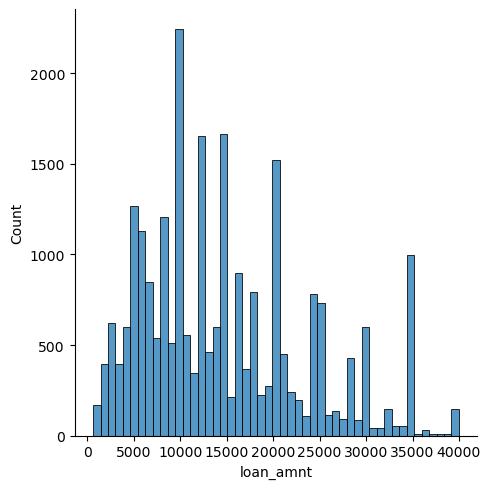

In [33]:
sns.displot(new_df['loan_amnt'])

In [34]:
sns.boxplot(x=new_df['loan_amnt'])

<AxesSubplot:xlabel='loan_amnt'>

In [35]:
print("Skewness: %f" % dfn['loan_amnt'].skew())
print("Kurtosis: %f" % dfn['loan_amnt'].kurt())

Skewness: 0.743667
Kurtosis: -0.128620


1. From the first feature we choose we find that the most count occur when the loan_amnt at 10000
2. The skewness of 0.74 means that the distribution is slightly tilted to the right (positively skewed); the kurtosis of -0.12 shows that the value of the peak of the distribution is a little lower than the normal distribution.

In [36]:
dfn['term'].describe()

count          24999
unique             2
top        36 months
freq           17865
Name: term, dtype: object

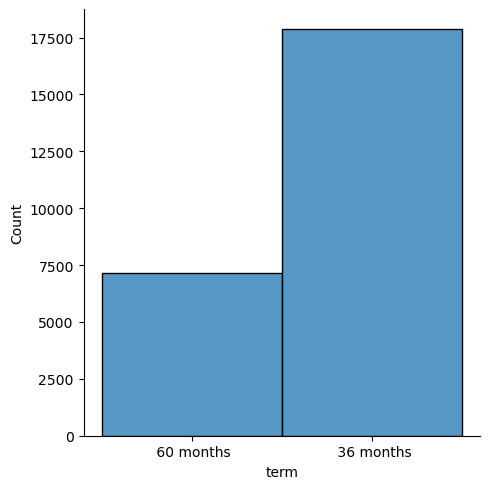

In [37]:
sns.displot(new_df['term'])

From this graph we can note the most count of number of payments is 36 month.

In [38]:
new_df['grade'].describe()

count     24999
unique        7
top           B
freq       7451
Name: grade, dtype: object

In [39]:
new_dfa=new_df.sort_values(by=['grade'])
sns.displot(new_df['grade'])  #to know the trend of overall grade in all data

The graph show the lending grade trend we find most count are grade B and grade C.

In [40]:
new_df['int_rate'].describe()

count    24999.000000
mean        13.218843
std          4.741118
min          5.320000
25%          9.760000
50%         12.740000
75%         15.990000
max         30.990000
Name: int_rate, dtype: float64

In [41]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=new_dfa, x=new_dfa.index, y='int_rate')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set the plot title and axis labels
plt.title('Interest Rates by each Company')
plt.xlabel('Index')
plt.ylabel('Interest Rate')

# Display the plot
plt.show()

From the scantter plot we find that there are lower firms which interest rate are over 25%

In [42]:
new_dfa['installment'].describe()

count    24999.000000
mean       436.788993
std        256.009134
min         21.590000
25%        251.580000
50%        377.620000
75%        577.035000
max       1501.000000
Name: installment, dtype: float64

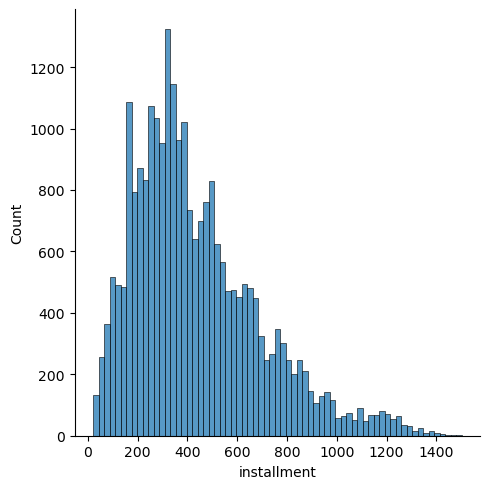

In [43]:
new_dfb=new_dfa.sort_values(by=['installment'])
sns.displot(new_dfa['installment']) 

The most installmentt are at 400, there are over 1200 count. The count in the range of 200 to 600 are higer than other installment. These mean if the loan originates, the most of the borrower need to pay about 400 dollars.

In [44]:
ddd = new_dfa[['emp_title', 'emp_length']]
new_df1 = ddd.dropna(subset=['emp_title', 'emp_length'])
new_df1

emp_title emp_length
12499                               Bookkeeper    2 years
8892                        Accounting Manager    2 years
8887                    gas pipeline installer  10+ years
22578  Teaching Assistant/ Adjunct Instructor     5 years
22581                    Deputy Division Chief    6 years
...                                        ...        ...
9038                           Claims Adjuster  10+ years
18136                               Accountant    7 years
13088                                       RN    9 years
418                       Solutions specialist    2 years
17043                             Case manager   < 1 year

[23383 rows x 2 columns]

we can know the job title supplied by the Borrower when applying for the loan. And also know how length they are living at the same company.

In [45]:
new_dfa['home_ownership'].describe()

count        24999
unique           6
top       MORTGAGE
freq         12359
Name: home_ownership, dtype: object

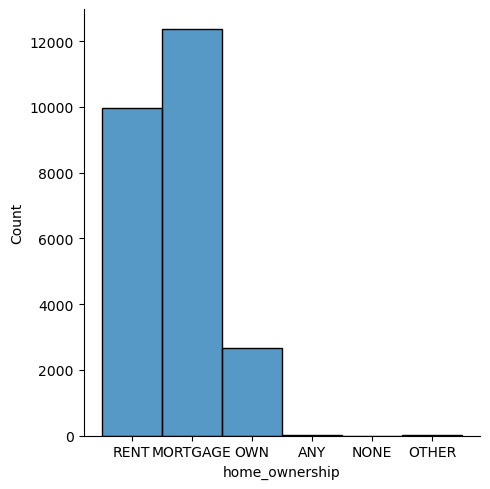

In [46]:
sns.displot(new_dfa['home_ownership'])

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER. Here we know hte mortgage is the most common status in this lending_club

In [47]:
new_dfa['annual_inc'].describe()

count    2.499900e+04
mean     7.706611e+04
std      5.497013e+04
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.200000e+04
max      1.500000e+06
Name: annual_inc, dtype: float64

In [48]:
aaa=new_dfa.sort_values(by=['annual_inc'])
sns.displot(new_dfa['annual_inc'])

In [49]:
sns.boxplot(x=new_dfa['annual_inc'])

<AxesSubplot:xlabel='annual_inc'>

The self-reported annual income provided by the borrower during registration. The average income are about 77066 dollars per year.

In [50]:
df1 = new_dfa['verification_status']
df1

12499    Source Verified
8892        Not Verified
8887        Not Verified
22578       Not Verified
22579           Verified
              ...       
13088    Source Verified
23547           Verified
418             Verified
17043           Verified
23975                NaN
Name: verification_status, Length: 25000, dtype: object

In [51]:
sns.displot(new_dfa['verification_status'])

Indicates if income was verified by LC, not verified, or if the income source was verified

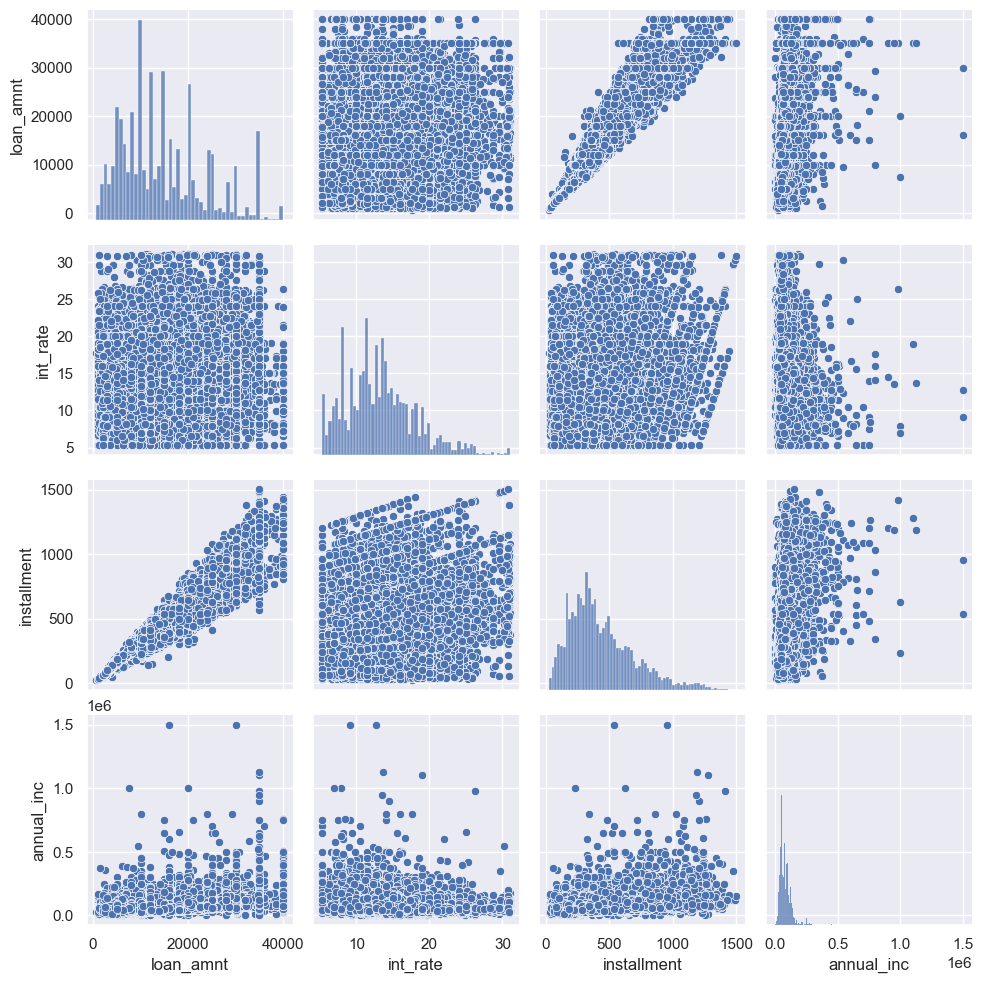

In [52]:
sns.set()
cols = ['loan_amnt', 'grade', 'term', 'int_rate',
       'installment', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status']
sns.pairplot(dfn[cols])
plt.show();

### Bivariate Analysis
The bivariate analysis begins to look at variables in pairs. The most common bivariate analysis is 'correlation', which can be visualized using a heatmap or a scatterplot.

A regression with only two variables produces the line of best fit you are used to seeing in Excel, and the correlation coefficient!

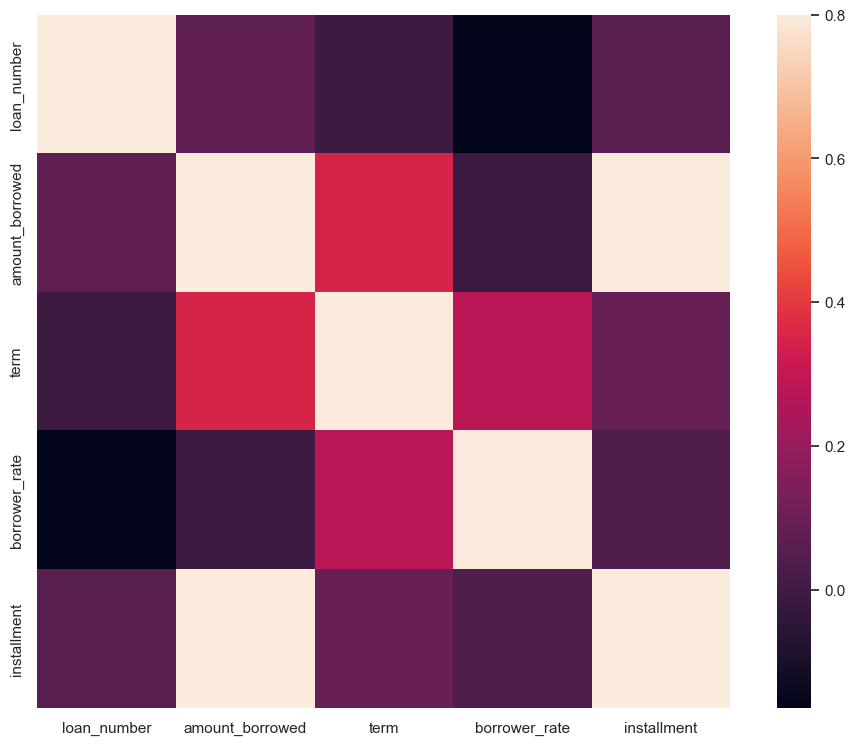

In [53]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

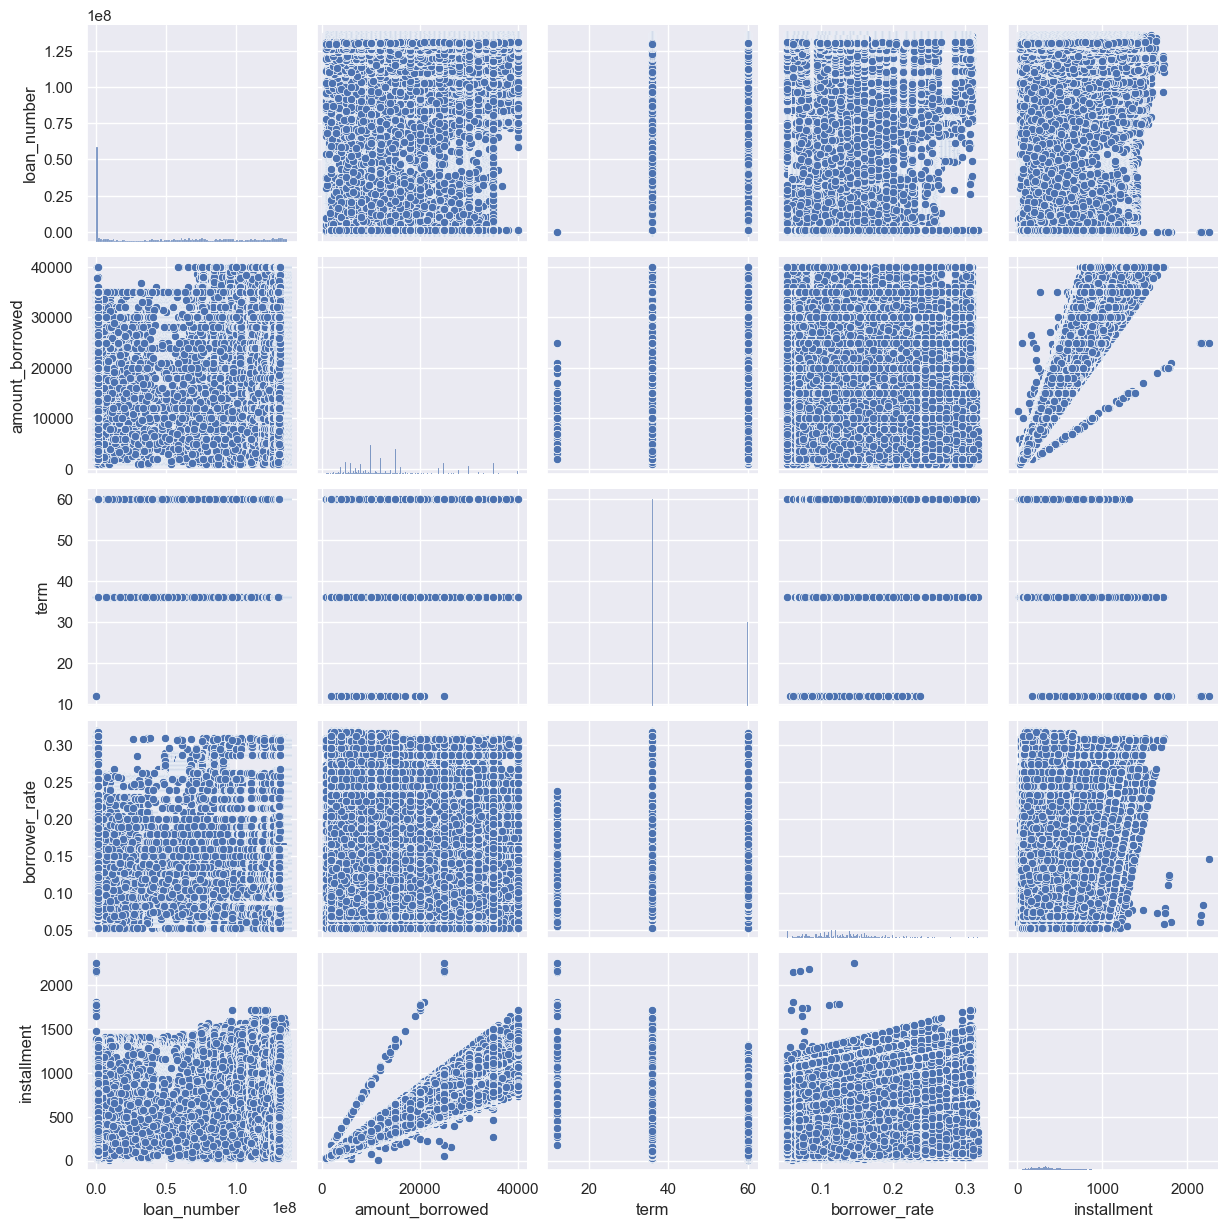

In [54]:
#scatterplot
sns.set()
cols = ['loan_number', 'amount_borrowed', 'term', 'borrower_rate',
       'installment', 'grade', 'origination_date', 'listing_title',
       'loan_status_description', 'data_source']
sns.pairplot(df[cols])
plt.show();

By looking at the heatmap and the scatterplot above, what conclusion can you draw?  Are there any high/low correlations that jump out?  Do they make sense?
We will incorporate this thinking into our next stage in 'Feature selection'.
*Note* that only continuous variables are shown.  We can also incorporate categorical variables into the scatter plot, but we'll have to do some data transformation.  We will do that in the Data cleaning part, and you may re-run the scatter plot after the transformation.

## Part 2: Data Preparation

This is the part where we make changes to the dataset so that it can feed nicely into the Machine Learning Models.
Data cleaning usually involves at least one of the below processes:
Dealing with inconsistent recording
* Removing unwanted observations
* Removing duplicates
* Investigating outliers
* Dealing with missing items


### Cleaning up the date columns

Remember there was a warning message when we import the file?  Dates should be imported into the dataframe as data type 'datetime' instead of 'object'.  Let's clean up this dataset by transforming all dates to 'datetime' format.

In [55]:
df['origination_date'] = pd.to_datetime(df['origination_date'])

In [56]:
# Now check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875146 entries, 0 to 2875145
Data columns (total 10 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   loan_number              int64         
 1   amount_borrowed          float64       
 2   term                     int64         
 3   borrower_rate            float64       
 4   installment              float64       
 5   grade                    object        
 6   origination_date         datetime64[ns]
 7   listing_title            object        
 8   loan_status_description  object        
 9   data_source              object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 219.4+ MB


### Handling Missing Data
There are a few options in dealing with missing data.  We could simply drop the row, given the dataset is large enough. Otherwise, you can consider some form of data imputation to address the problem:
* Mean substitution
* Regression with multiple imputation
* Full information maximum likelihood

There are Python packages that can assist you with data imputation, but we will not get into that.

In [57]:
df.isnull().sum()

loan_number                     0
amount_borrowed                 0
term                            0
borrower_rate                   0
installment                     0
grade                           0
origination_date                0
listing_title              863078
loan_status_description         0
data_source                     0
dtype: int64

All the missing data comes from 'listing_title'.  What will you do?  Should you replace missing value with something like 'unknown'? or do you remove these rows?

In [58]:
# We will replace all the 'NaN's in the column 'listing_title'
df['listing_title'] = df['listing_title'].fillna('unknown')

In [59]:
df['listing_title'].value_counts()

debt_consolidation    1154304
unknown                863078
credit_card            441191
home_improvement       136263
other                  124427
major_purchase          44442
medical                 24808
small_business          22834
car                     21261
vacation                13992
moving                  13336
house                   12099
wedding                  1850
renewable_energy         1259
educational                 2
Name: listing_title, dtype: int64

### Keeping only useful rows

In [60]:
# Let us examine the target column "loan_status_description"
df['loan_status_description'].value_counts()

CURRENT      1381520
COMPLETED    1173162
CHARGEOFF     222867
DEFAULTED      95344
CANCELLED       2253
Name: loan_status_description, dtype: int64

If we only want the Machine Learning model to predict whether a loan will be 'completed' or 'defaulted', the other status in our target column may not be useful and can be removed.

In [61]:
df_filtered = df.loc[df['loan_status_description'].isin(['COMPLETED','DEFAULTED'])]

In [62]:
df_filtered['loan_status_description'].value_counts()

COMPLETED    1173162
DEFAULTED      95344
Name: loan_status_description, dtype: int64

Number of default loan is only ~8% of all records.  This is a 'imbalanced' dataset.

In [63]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1268506 entries, 0 to 2875079
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   loan_number              1268506 non-null  int64         
 1   amount_borrowed          1268506 non-null  float64       
 2   term                     1268506 non-null  int64         
 3   borrower_rate            1268506 non-null  float64       
 4   installment              1268506 non-null  float64       
 5   grade                    1268506 non-null  object        
 6   origination_date         1268506 non-null  datetime64[ns]
 7   listing_title            1268506 non-null  object        
 8   loan_status_description  1268506 non-null  object        
 9   data_source              1268506 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 106.5+ MB


### Removing features that may not be useful

Decision Tree is one of the most widely-used ML algorithms.  It can handle both continuous and categorical data.  However, it cannot process 'datetime', unless we transform 'datetime' into a numerical value like age, or categrical value like seasons or year.  For my example here, I will remove the 'origination_dates' to keep things simple.  You may play with some feature engineering if you wish to see whether that can improve the model.  
We also need to convert categorical variables into numerical 'levels'.  The codes are provided for you below:



In [64]:
# We will remove the datetime columns and other irrelavent columns
df_filtered = df_filtered.drop(columns=['origination_date', 'data_source'])

In [65]:
df_filtered.head()

loan_number  amount_borrowed  term  borrower_rate  installment grade  \
0     10149342          27050.0    36         0.1099       885.46     B   
1     10149488           4800.0    36         0.1099       157.13     B   
2     10148122          12000.0    36         0.0762       373.94     A   
3     10119623          12000.0    36         0.1199       398.52     B   
4     10159498          12000.0    36         0.0662       368.45     A   

        listing_title loan_status_description  
0  debt_consolidation               COMPLETED  
1    home_improvement               COMPLETED  
2  debt_consolidation               COMPLETED  
3  debt_consolidation               COMPLETED  
4  debt_consolidation               COMPLETED

### Data transformation

In [66]:
# Decision tree cannot process categorical variables that are strings(objects).  
# We need to transform them into numerical levels using a library called LabelEncoder.
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_filtered['grade'] = labelencoder.fit_transform(df_filtered['grade'])
df_filtered['listing_title'] = labelencoder.fit_transform(df_filtered['listing_title'])
# 0 = good, 1 = default
df_filtered['loan_status_description'] = labelencoder.fit_transform(df_filtered['loan_status_description'])

In [67]:
# Let check the transformation
df_filtered.head()

loan_number  amount_borrowed  term  borrower_rate  installment  grade  \
0     10149342          27050.0    36         0.1099       885.46      1   
1     10149488           4800.0    36         0.1099       157.13      1   
2     10148122          12000.0    36         0.0762       373.94      0   
3     10119623          12000.0    36         0.1199       398.52      1   
4     10159498          12000.0    36         0.0662       368.45      0   

   listing_title  loan_status_description  
0              2                        0  
1              4                        0  
2              2                        0  
3              2                        0  
4              2                        0

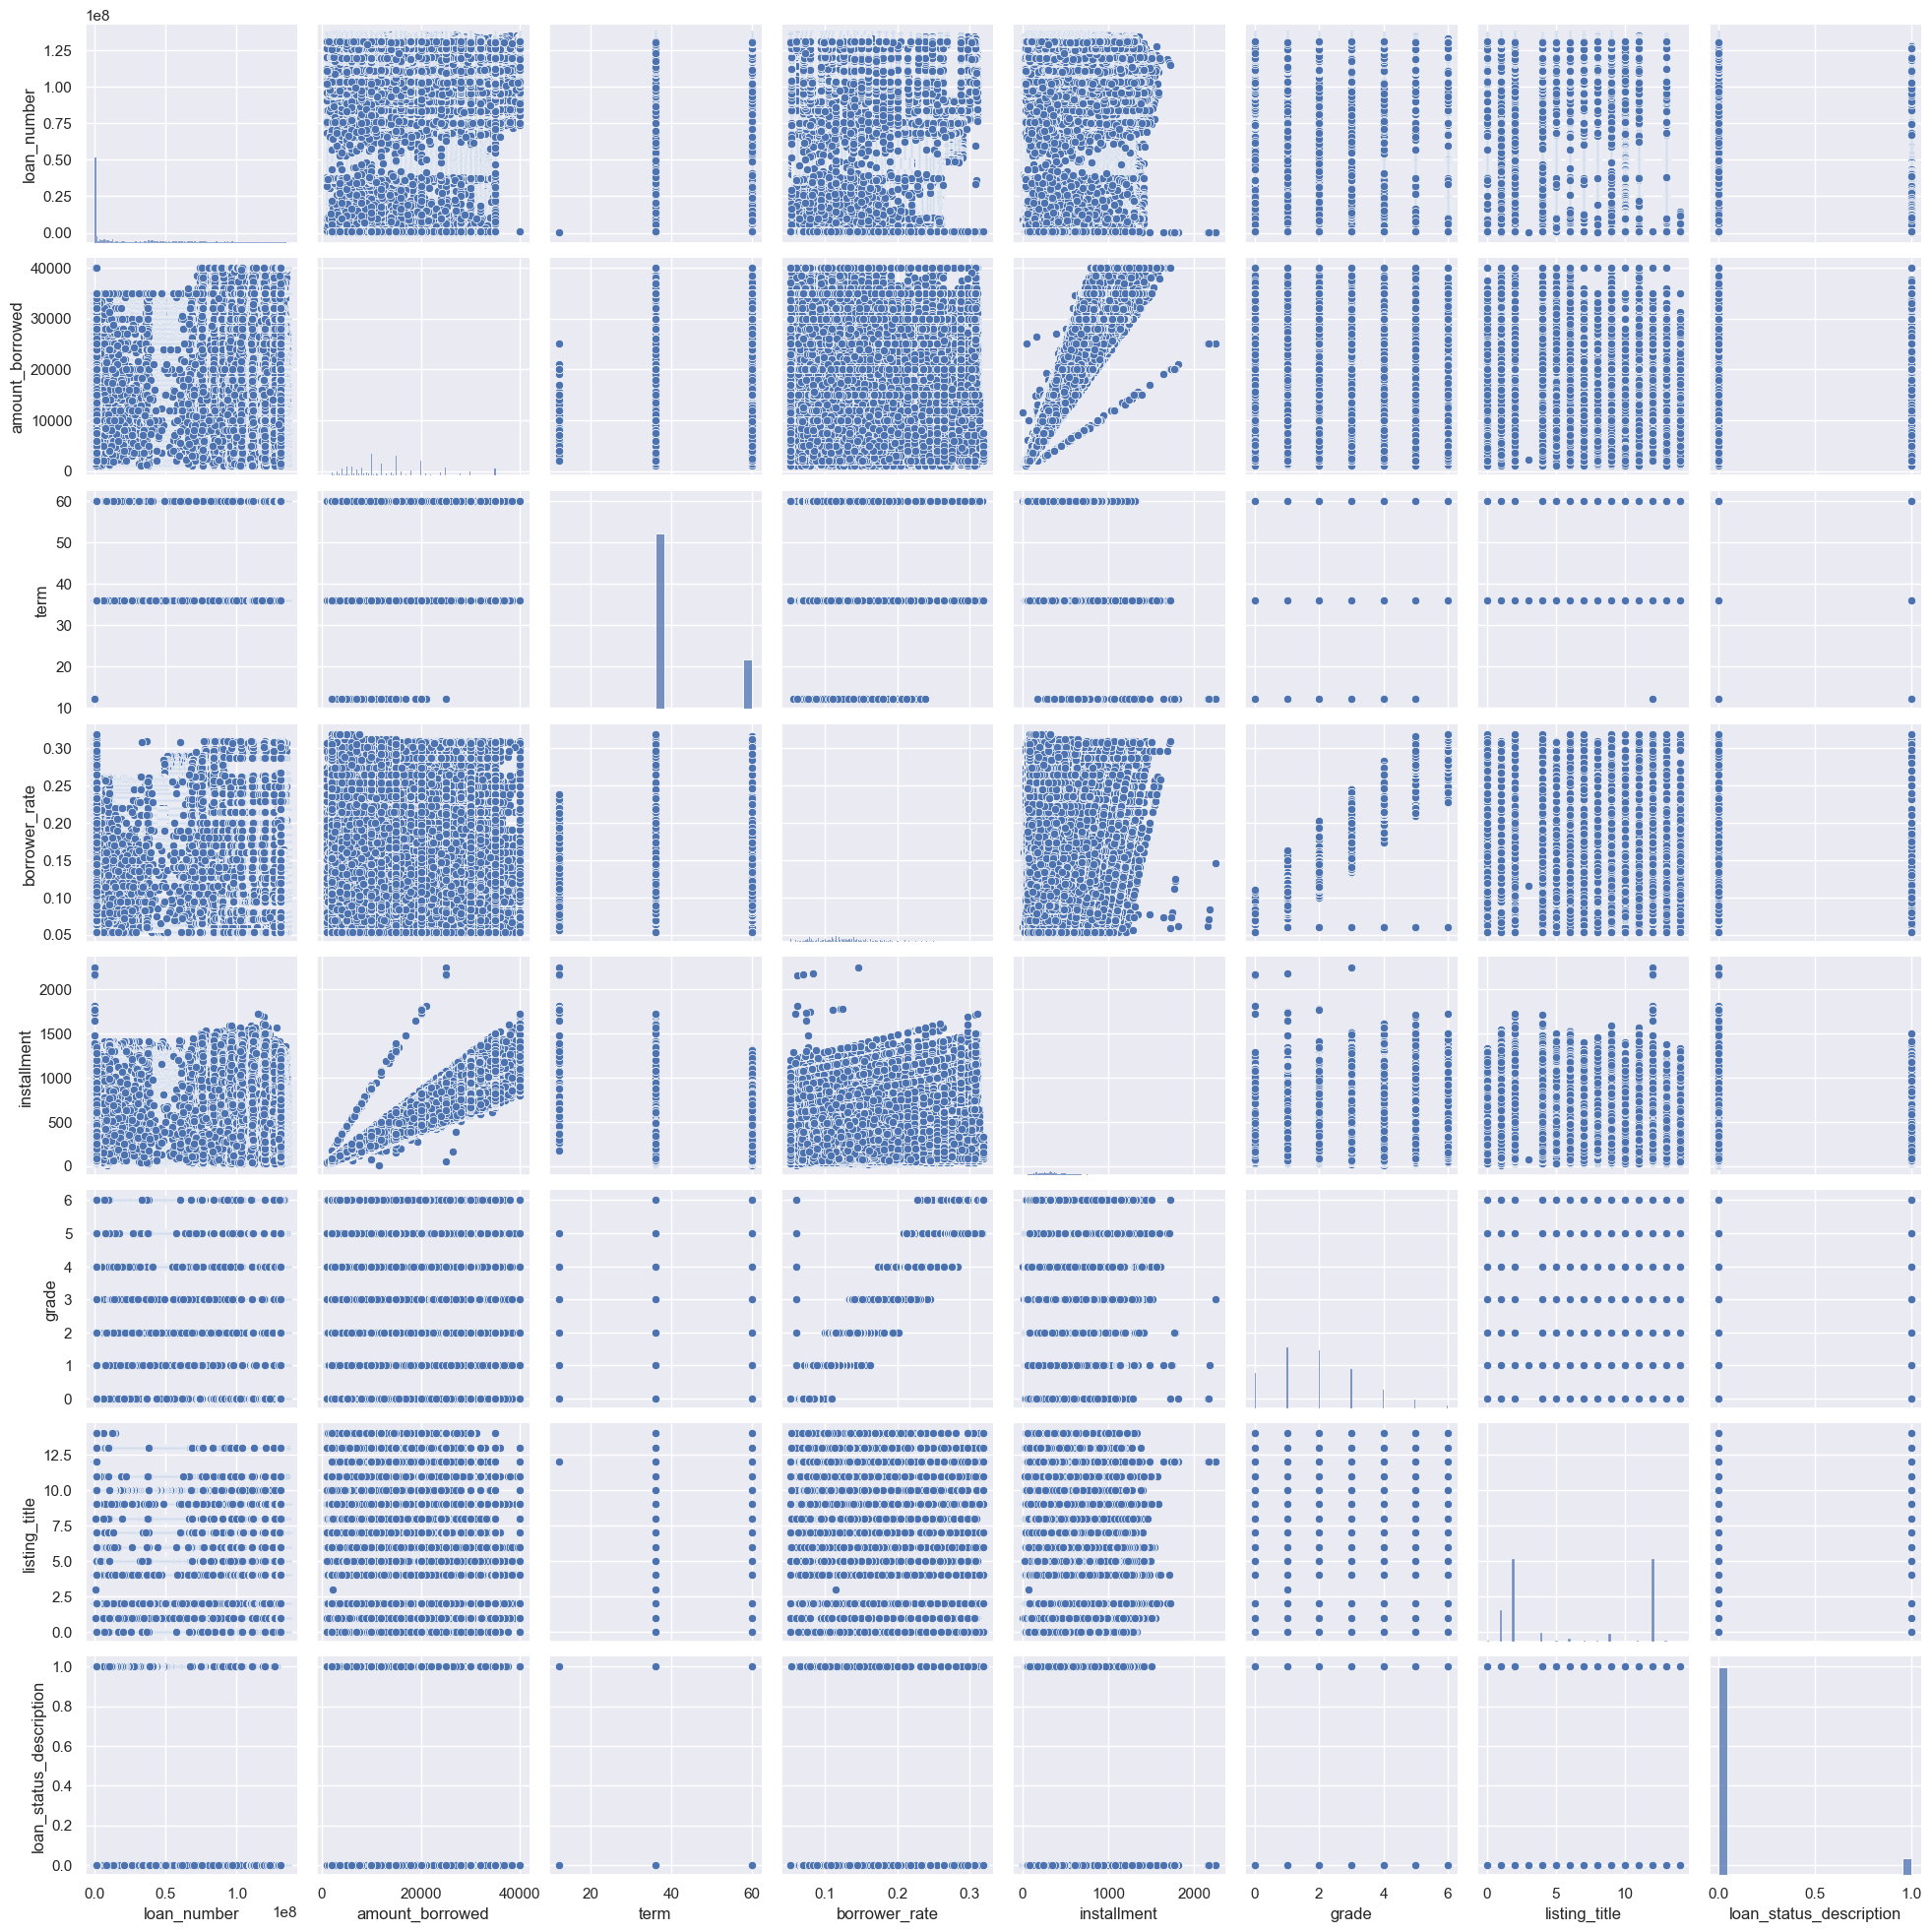

In [68]:
# Now let's try the scatterplot again.  We can see the categorical variables showing now.
sns.set()
cols = ['loan_number', 'amount_borrowed', 'term', 'borrower_rate',
       'installment', 'grade', 'listing_title',
       'loan_status_description']
sns.pairplot(df_filtered[cols])
plt.show();

## Part 3: Splitting data into training data and test data

'loan_status_description' will be our 'target' for the Machine Learning model to learn from and predict.
Before we feed the clean dataset into the model, we will split the dataset into training data and testing data.  The ML model will train on the training dataset and we will observe the model accuracy by feeding test data into the model for predicted targets.

In general, we will split the dataset 70/30.  70% of data will be used as training data and 30% for testing.  

Because most bankruptcy/bad debt data is imbalanced, i.e only a small percentage of data is bankrupt.  We need to make sure that both the training and testing dataset has the same proportion of bankruptcy.
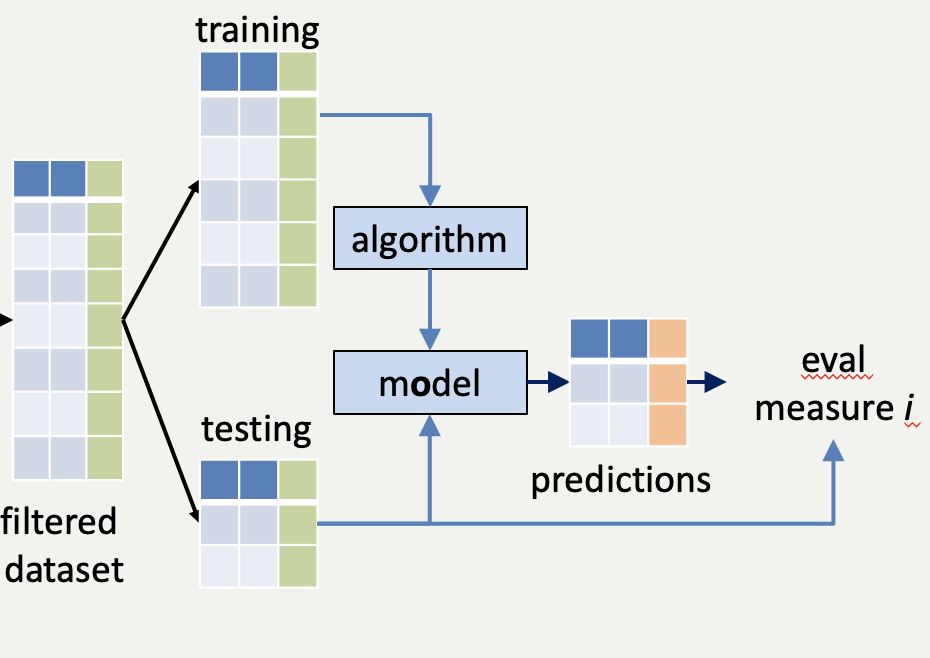

In [69]:
# import the libraries that help us split the dataset
from sklearn.model_selection import train_test_split

In [70]:
# After you drop columms, make sure the column index matches
x, y = df_filtered.iloc[:, 0:6], df_filtered.iloc[:,7]

In [71]:
df_filtered.head()

loan_number  amount_borrowed  term  borrower_rate  installment  grade  \
0     10149342          27050.0    36         0.1099       885.46      1   
1     10149488           4800.0    36         0.1099       157.13      1   
2     10148122          12000.0    36         0.0762       373.94      0   
3     10119623          12000.0    36         0.1199       398.52      1   
4     10159498          12000.0    36         0.0662       368.45      0   

   listing_title  loan_status_description  
0              2                        0  
1              4                        0  
2              2                        0  
3              2                        0  
4              2                        0

In [72]:
# We will do a 70/30 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [73]:
# 0=completed, 1=defaulted
y_test.value_counts()

0    351949
1     28603
Name: loan_status_description, dtype: int64

In [74]:
y_train.value_counts()

0    821213
1     66741
Name: loan_status_description, dtype: int64

In [75]:
x_train.head()

loan_number  amount_borrowed  term  borrower_rate  installment  grade
2029768        99969          20744.0    36         0.1459   714.939608      2
1039811     77901884           5000.0    36         0.1446   172.010000      2
150897       1587003          16000.0    36         0.1212   532.350000      1
498519      64108306          16000.0    60         0.1318   365.530000      2
357570      15469736           6000.0    36         0.1416   205.540000      2

In [76]:
# import ML libraries
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy',random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [77]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

## Part 4: Evaluation
### Model performance

In [78]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

tp = float(cm[1][1])
tn = float(cm[0][0])
fp = float(cm[0][1])
fn = float(cm[1][0])

print(cm)

[[330138  21811]
 [ 21054   7549]]


In [79]:
# Sensitivity: the ability of a test to correctly identify loans that will default.
sensitivity = tp/(tp+fn)

# Specificity: the ability of a test to correctly identify loans that will complete(Without default).
specificity = tn/(tn+fp)

print(sensitivity)
print(specificity)

0.2639233646820264
0.9380279529136324


## Part 5: Improving the Model
### Feature Selections
Feature selection is a process of selecting a subset of features to use in model training, 
aka subset selection.  Instead of feeding all 9 features into the model, can you try different subsets of features and see wether you can improve the model's predictive performance?

Here are some hints for you to try:
* If two features are highly correlated, some algorithms will perform badly.  Try remove one and keep the other.
* Remove useless features
* Remove features with zero variance or low variance
* Remove features that are not at all correlated with target
* Try combinations of the above or combinations of different subsets

Run the ML model for at least 3 times with different feature selctions combinations.  Show your code and model performance for all trials.  